# AN, SIA, SIDIS Analysis

In [1]:
import sys
import os;os.chdir('../')
import itertools as it
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline
from tools.tools import save,load,lprint
from tools.config import load_config, conf
from tools.bar import BAR
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)

In [2]:
load_config('inputs/an_sia_sidis_Htilde.py')
conf['resman']=RESMAN()
conf['parman']=PARMAN()
conf['resman'].get_residuals(conf['parman'].par);

loading sidis data sets 3013
multiprocess setup: ncpus=4 / observable
loading sia data sets 2009
multiprocess setup: ncpus=4 / observable
loading AN data sets 2003
multiprocess setup: ncpus=4 / observable


## Load SIA data from files

In [3]:
ALL=pd.concat([pd.DataFrame(conf['resman'].siares.tabs[idx]) \
              for idx in conf['resman'].siares.tabs.keys()])

ALL.columns

Index([          u'N',           u'Q',          u'Q2',     u'S2/1+C2',
           u'S2/1-C2',       u'Shift',       u'alpha',         u'col',
          u'dS2/1-C2',         u'dqT',         u'dz1',         u'dz2',
           u'hadron1',     u'hadron2',           u'i',         u'obs',
                u'pT',       u'pTmax',       u'pTmin',          u'qT',
       u'r-residuals',   u'residuals',       u'shift',      u'stat_u',
             u'sys_u',       u'syt_u',         u'thy',       u'value',
                u'z1',       u'z1max',       u'z1min',          u'z2',
             u'z2max',       u'z2min'],
      dtype='object')

## Organize data
Organize data from different collaborations with different observables

In [4]:
data = {}
collaborations = np.unique(ALL.col)

for collab in collaborations:
    data[collab] = {}
    
    data_subset = ALL[ALL.col == collab]
    observables = np.unique(data_subset.obs)
    
    for observable in observables:        
        data[collab][observable] = data_subset[data_subset.obs == observable]        
        print('Collaboration: %s, Observerable: %s, Points: %d' % (collab, observable, len(data[collab][observable])))

Collaboration: BaBaR, Observerable: AUC-0-PT, Points: 9
Collaboration: BaBaR, Observerable: AUC-0-PT-INT, Points: 52
Collaboration: BaBaR, Observerable: AUL-0-PT, Points: 9
Collaboration: BaBaR, Observerable: AUL-0-PT-INT, Points: 52
Collaboration: belle, Observerable: AUC-0-PT-INT, Points: 16
Collaboration: belle, Observerable: AUL-0-PT-INT, Points: 16


## Plot results 
Plot the data vs. theory curves

In [5]:
data = {}

for key, value in conf['resman'].siares.tabs.iteritems():
    data[key] = pd.DataFrame(value)

In [6]:
plt.rc('font', family='serif')
plt.rc('font', size=16)

In [7]:
# from the paper https://arxiv.org/pdf/1309.5278.pdf
z1_bins = np.array([0.15, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9])

In [8]:
ALL=pd.concat([pd.DataFrame(conf['resman'].siares.tabs[idx]) \
              for idx in conf['resman'].siares.tabs.keys()])

ALL.columns

Index([          u'N',           u'Q',          u'Q2',     u'S2/1+C2',
           u'S2/1-C2',       u'Shift',       u'alpha',         u'col',
          u'dS2/1-C2',         u'dqT',         u'dz1',         u'dz2',
           u'hadron1',     u'hadron2',           u'i',         u'obs',
                u'pT',       u'pTmax',       u'pTmin',          u'qT',
       u'r-residuals',   u'residuals',       u'shift',      u'stat_u',
             u'sys_u',       u'syt_u',         u'thy',       u'value',
                u'z1',       u'z1max',       u'z1min',          u'z2',
             u'z2max',       u'z2min'],
      dtype='object')

In [9]:
def plotSIA(data1, data2, 
         label1='dataset 1', label2='dataset 2'):

    n_col = 3
    n_row = len(z1_bins)/n_col + 1

    plt.figure(figsize=(4 *n_col, 3 *n_row))

    for index in range(len(z1_bins)-1):
        data_sub1 = data1.query('z1 > %f and z1 < %f' % (z1_bins[index], z1_bins[index+1]))
        data_sub2 = data2.query('z1 > %f and z1 < %f' % (z1_bins[index], z1_bins[index+1]))

        plt.subplot(n_row, n_col, index+1)
        
        plt.errorbar(data_sub1.z2, data_sub1.value, data_sub1.alpha, 
                    marker='o', linestyle='', color='red', label=label1)
        plt.plot(data_sub1.z2, data_sub1.thy, linestyle='-', color='red')
        


        plt.errorbar(data_sub2.z2, data_sub2.value, data_sub2.alpha, 
                    marker='o', linestyle='', color='blue', label=label2)
        plt.plot(data_sub2.z2, data_sub2.thy, linestyle='-', color='blue')
        
        
        plt.xlim([0.0, 1.0])
        plt.xlabel('$Z_2$')
        plt.title('$Z_1 \in [%.1f, %.1f]$' % (z1_bins[index], z1_bins[index+1]))
        
        if len(data_sub1) > 0 and len(data_sub2) > 0:
            handles, labels = plt.gca().get_legend_handles_labels()
            good_handles = []
            good_labels = []
            for handle, label in zip(handles, labels):
                if 'thy' not in label:
                    good_handles.append(handle)
                    good_labels.append(label)
            
            plt.legend(good_handles, good_labels, frameon=False, loc='topleft')
        
    plt.tight_layout()

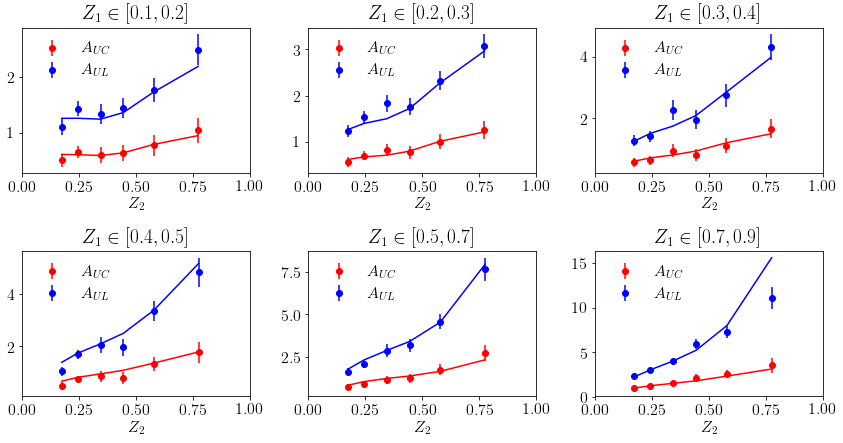

In [10]:
plotSIA(data[1002], data[1003], '$A_{UC}$', '$A_{UL}$')

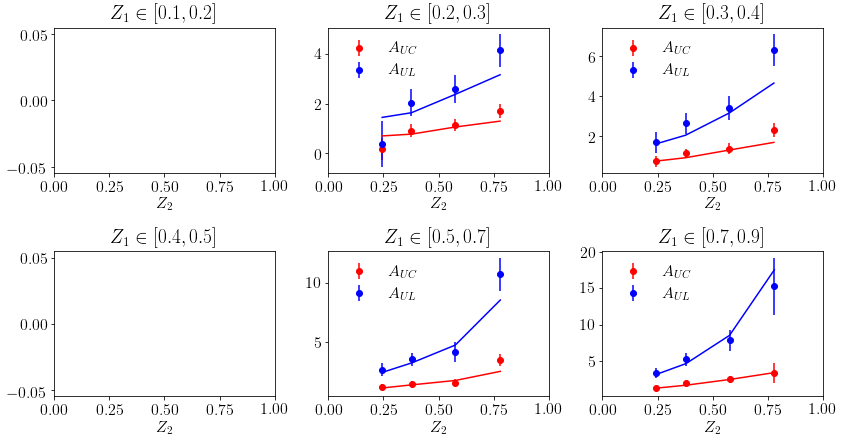

In [11]:
plotSIA(data[1004], data[1005], '$A_{UC}$', '$A_{UL}$')

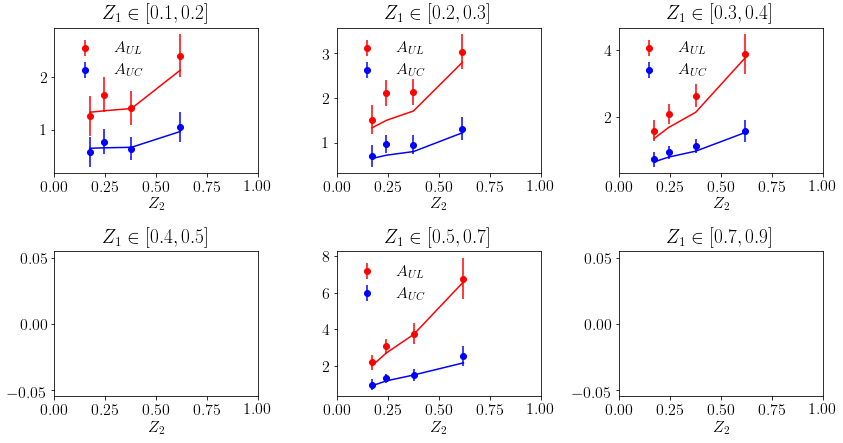

In [12]:
plotSIA(data[2008], data[2009], '$A_{UL}$', '$A_{UC}$')

In [17]:
plotSIA(data[2000], data[2002], '$A_{UL}$', '$A_{UC}$')

KeyError: 2000

In [18]:
plotSIA(data[2004], data[2005], '$A_{UL}$', '$A_{UC}$')

KeyError: 2004

## Load AN data from files

In [13]:
ALL=pd.concat([pd.DataFrame(conf['resman'].ANres.tabs[idx]) \
              for idx in conf['resman'].ANres.tabs.keys()])

ALL.columns

Index([          u'N',       u'Shift',       u'alpha',         u'col',
            u'hadron',         u'obs',          u'pT', u'r-residuals',
         u'residuals',          u'rs',       u'shift',  u'stat_err_u',
         u'sys_err_u',      u'target',         u'thy',       u'value',
                u'xF'],
      dtype='object')

## Organize data
Organize data from different collaborations with different observables

In [14]:
data = {}
collaborations = np.unique(ALL.col)

for collab in collaborations:
    data[collab] = {}
    
    data_subset = ALL[ALL.col == collab]
    observables = np.unique(data_subset.obs)
    
    for observable in observables:        
        data[collab][observable] = data_subset[data_subset.obs == observable]        
        print('Collaboration: %s, Observerable: %s, Points: %d' % (collab, observable, len(data[collab][observable])))

Collaboration: BRAHMS, Observerable: AN, Points: 18
Collaboration: STAR, Observerable: AN, Points: 42


## Plot results 
Plot the data vs. theory curves

In [15]:
data = {}

for key, value in conf['resman'].ANres.tabs.iteritems():
    data[key] = pd.DataFrame(value)

In [16]:
plt.rc('font', family='serif')
plt.rc('font', size=16)

In [17]:
ALL=pd.concat([pd.DataFrame(conf['resman'].ANres.tabs[idx]) \
              for idx in conf['resman'].ANres.tabs.keys()])

ALL.columns

Index([          u'N',       u'Shift',       u'alpha',         u'col',
            u'hadron',         u'obs',          u'pT', u'r-residuals',
         u'residuals',          u'rs',       u'shift',  u'stat_err_u',
         u'sys_err_u',      u'target',         u'thy',       u'value',
                u'xF'],
      dtype='object')

In [18]:
def plotBRAHMS(data1,data2,label1='dataset 1'):

    data_sub1 = data1.query('xF > 0')
    data_sub2 = data2.query('xF > 0')
    
    plt.errorbar(data_sub1.xF, data_sub1.value, data_sub1.alpha, 
                    marker='o', linestyle='', color='red', label=label1)
    plt.plot(data_sub1.xF, data_sub1.thy, linestyle='-', color='red')
    
    plt.errorbar(data_sub2.xF, data_sub2.value, data_sub2.alpha, 
                    marker='o', linestyle='', color='blue', label=label1)
    plt.plot(data_sub2.xF, data_sub2.thy, linestyle='-', color='blue')
    
    #plt.errorbar(data_sub3.xF, data_sub3.value, data_sub3.alpha, 
    #               marker='o', linestyle='', color='red', label=label3)
    #plt.plot(data_sub3.xF, data_sub3.thy, linestyle='-', color='red')
    
    #plt.errorbar(data_sub4.xF, data_sub4.value, data_sub4.alpha, 
    #                marker='o', linestyle='', color='blue', label=label1)
    #plt.plot(data_sub4.xF, data_sub4.thy, linestyle='-', color='blue')
    
    
    plt.xlim([0.1, 0.35])
    plt.xlabel('$x_F$')
    plt.title(label1,loc='left')
        
    plt.tight_layout()

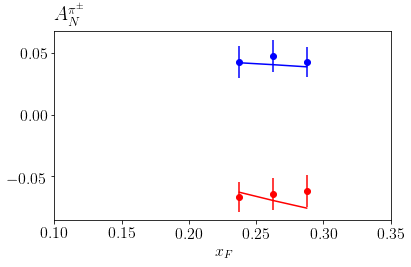

In [19]:
plotBRAHMS(data[1000],data[1002],'$A_{N}^{\pi^\pm}$')

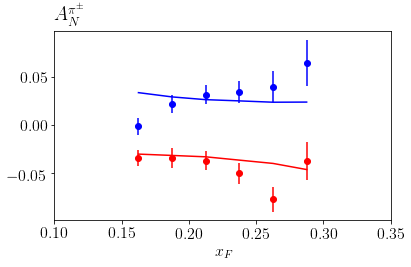

In [20]:
plotBRAHMS(data[1001],data[1003],'$A_{N}^{\pi^\pm}$')

In [21]:
def plotSTAR(data1,data2,data3,data4,label1='dataset 1'):

    data = [data1,data2,data3,data4]
    
    plt.figure(figsize=(10,10))
    
    for k in range(len(data)):
    
        plt.subplot(2, 2, k+1)
    
        data_sub = data[k].query('xF > 0')
    
        plt.errorbar(data_sub.xF, data_sub.value, data_sub.alpha, 
                    marker='o', linestyle='', color='red', label=label1)
        plt.plot(data_sub.xF, data_sub.thy, linestyle='-', color='red')
    
    
        plt.xlim([0.1, 0.8])
        plt.xlabel('$x_F$')
        plt.title(label1,loc='left')
        
    plt.tight_layout()

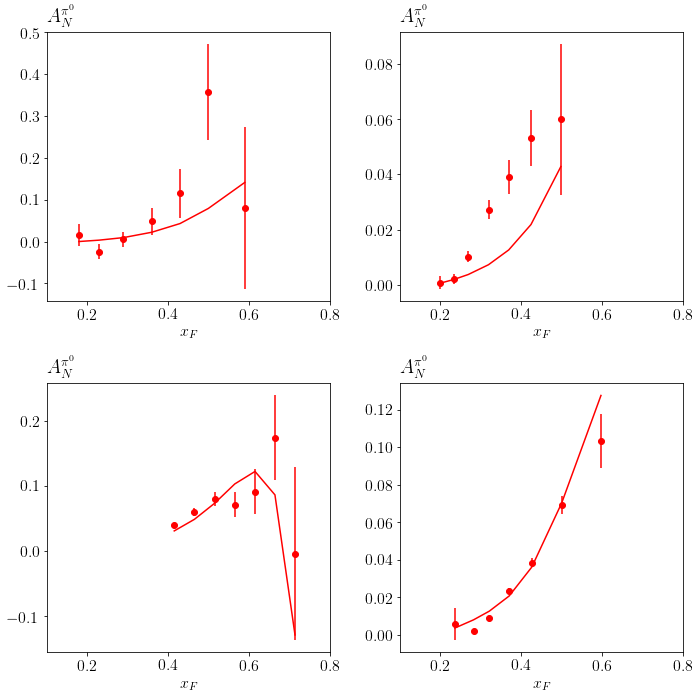

In [22]:
plotSTAR(data[2000],data[2001],data[2002],data[2003],'$A_{N}^{\pi^0}$')